In [1]:
import torch

import tr_util
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
default_path = 'results/min_tree_ppo/node/'
# default_path = 'results/min_tree_ppo/node_cuda/'
agent_path = '250410_1143#n10_e33_g40_g_3-2h'
correl_path = f'{default_path}{agent_path}'

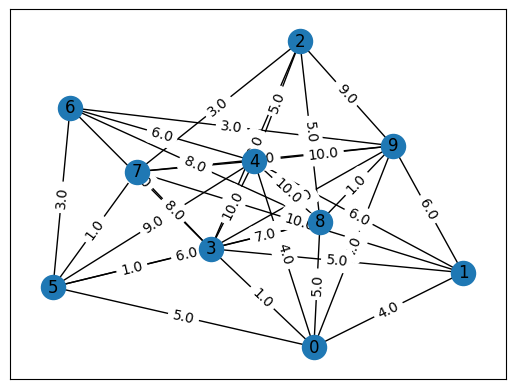

,0,1,2,3,4,5,6,7,8,9
iter,,,,,,,,,,
0,117,110,98,137,137,97,94,111,118,133
1,107,109,98,138,136,110,100,117,107,130
2,121,90,96,146,128,108,96,115,129,123
3,99,110,100,129,134,106,103,114,124,133
4,110,95,103,139,151,110,103,107,115,119
...,...,...,...,...,...,...,...,...,...,...
995,113,93,104,136,123,119,106,112,111,135
996,106,99,88,144,145,109,101,110,121,129
997,106,105,103,139,134,109,91,116,129,120


In [27]:
actions_df = pd.read_csv(f'{correl_path}/actions_debug.csv', index_col=0)
graph = torch.load(f'{correl_path}/graph.pt', weights_only=False)
util.show_data(graph)
actions_df

In [28]:
degrees = util.get_out_edges(graph)
torch.stack([graph.x[:, 0], degrees])

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [6., 5., 5., 9., 9., 6., 5., 6., 7., 8.]])

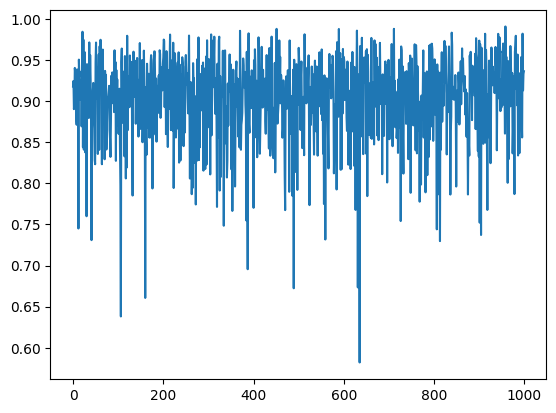

In [29]:
from scipy.stats import pearsonr

correlations = []
for _, row in actions_df.iterrows():
    corr, _ = pearsonr(degrees, row)
    correlations.append(corr)
plt.plot(correlations)